In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [2]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1], test_size=0.2, random_state=2)

X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
37,0.08014,0.0,5.96,0,0.499,5.850,41.5,3.9342,5,279,19.2,396.90,8.77
286,0.01965,80.0,1.76,0,0.385,6.230,31.5,9.0892,1,241,18.2,341.60,12.93
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
25,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307,21.0,303.42,16.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307,21.0,396.90,18.72
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
493,0.17331,0.0,9.69,0,0.585,5.707,54.0,2.3817,6,391,19.2,396.90,12.01
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47


In [5]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Use the trained model to predict the target values in the test set
y_pred = model.predict(X_test)

In [6]:
# Calculate the Mean Squared Error of the model on the test set
mse = mean_squared_error(y_test, y_pred)

print('Mean Squared Error:', mse)

r2 = r2_score(y_test, y_pred)

print('r2 score:', r2)

Mean Squared Error: 18.49542012244852
r2 score: 0.7789207451814403


C:\Users\tbaka\AppData\Local\Temp\ipykernel_3996\911229094.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')


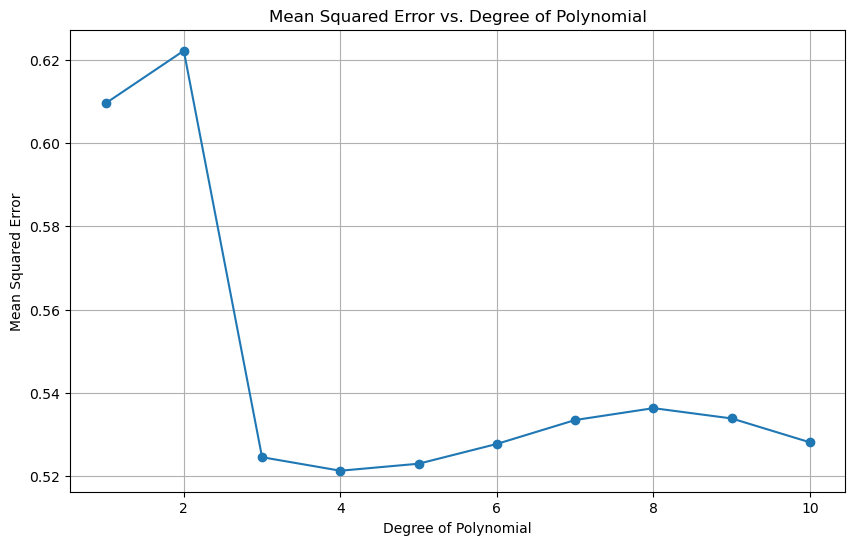

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Load the Auto MPG dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')

# Drop rows with missing values
auto_mpg = auto_mpg.dropna()

# Define features and target
features = auto_mpg[['Horsepower']]  # Only use 'Horsepower' as a feature
target = auto_mpg['MPG']

# List of polynomial degrees
degrees = list(range(1, 11))  # Extend degrees to 10

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=4)

# List to store Mean Squared Errors
mse_list = []

for degree in degrees:
    # Add polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Create a linear regression model
    model = LinearRegression()

    # Train the model on the polynomial features training data
    model.fit(X_train_poly, y_train)

    # Use the trained model to predict the target values in the test set
    y_pred = model.predict(X_test_poly)

    # Calculate the Mean Squared Error of the model on the test set
    mse = mean_squared_error(y_test, y_pred)

    # Store the Mean Squared Error in the list
    mse_list.append(mse)

# Plot the Mean Squared Error as a function of the degree of the polynomial
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_list, marker='o')
plt.title('Mean Squared Error vs. Degree of Polynomial')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


In [7]:
auto_mpg

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...
27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


C:\Users\tbaka\AppData\Local\Temp\ipykernel_3996\1587718092.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')


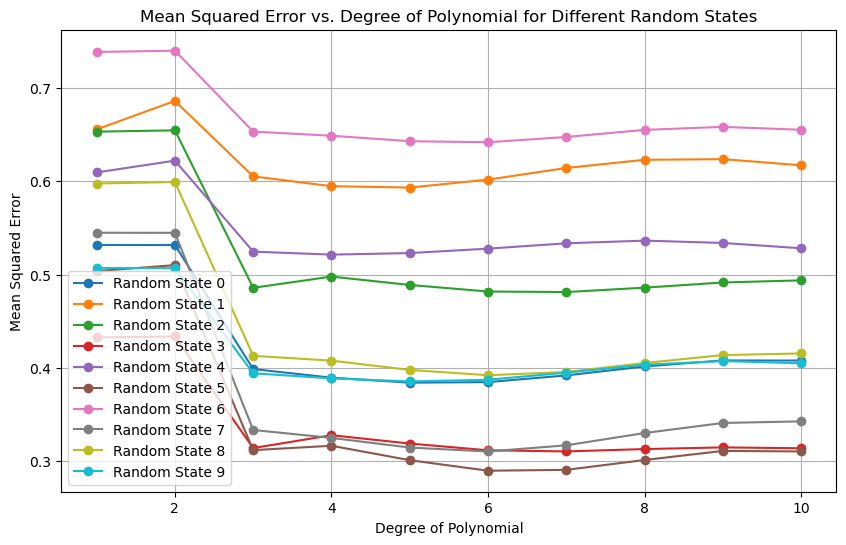

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Load the Auto MPG dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')

# Drop rows with missing values
auto_mpg = auto_mpg.dropna()

# Define features and target
features = auto_mpg[['Horsepower']]  # Only use 'Horsepower' as a feature
target = auto_mpg['MPG']

# List of polynomial degrees
degrees = list(range(1, 11))  # Extend degrees to 10

# List of random states
random_states = list(range(10))

# Create a plot
plt.figure(figsize=(10, 6))

for i, random_state in enumerate(random_states):
    # Split the dataset into a training set and a test set
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=random_state)

    # List to store Mean Squared Errors
    mse_list = []

    for degree in degrees:
        # Add polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Create a linear regression model
        model = LinearRegression()

        # Train the model on the polynomial features training data
        model.fit(X_train_poly, y_train)

        # Use the trained model to predict the target values in the test set
        y_pred = model.predict(X_test_poly)

        # Calculate the Mean Squared Error of the model on the test set
        mse = mean_squared_error(y_test, y_pred)

        # Store the Mean Squared Error in the list
        mse_list.append(mse)

    # Plot the Mean Squared Error as a function of the degree of the polynomial for the current random state
    plt.plot(degrees, mse_list, marker='o', label=f'Random State {random_state}')

plt.title('Mean Squared Error vs. Degree of Polynomial for Different Random States')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Use the trained model to predict the target values in the test set
y_pred_test = model.predict(X_test)

# Calculate the accuracy of the model on the training and test sets
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Test Accuracy:', accuracy_test)


Test Accuracy: 0.8704285714285714


### Leave One Out Cross Validation (LOOCV)

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut, cross_val_score

# Load the Boston Housing dataset
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
print(len(y))
# Create a linear regression model
model = LinearRegression()

# Create a LeaveOneOut cross-validator
loo = LeaveOneOut()

# Use cross_val_score for the dataset with the model and LOOCV
# This will return the scores for each iteration of LOOCV
scores = cross_val_score(model, X, y, cv=loo, scoring='neg_mean_squared_error')

mse_scores = -scores  # Invert the sign of the scores

print(len(mse_scores))
# Print the mean MSE over all LOOCV iterations
print("Mean MSE:", mse_scores.mean())

506
506
Mean MSE: 23.7257455194762


In [11]:
scores

array([-3.72979719e+01, -1.19996083e+01, -1.74878280e+01, -2.37110133e+01,
       -7.04199800e+01, -1.22185247e+01, -1.06607826e-02, -6.08323283e+01,
       -2.76061960e+01, -4.35492529e-04, -1.71891129e+01, -7.57242810e+00,
       -6.52257805e-01, -7.37772576e-01, -1.20890968e+00, -3.73396196e-01,
       -6.92394876e+00, -3.54752744e-01, -1.69701375e+01, -4.35547121e-02,
       -1.20164044e+00, -3.82170339e+00, -4.13536519e-01, -4.99399777e-01,
       -6.33146773e-03, -2.72147161e-01, -1.33111630e+00, -8.65299886e-03,
       -1.36231825e+00, -1.57472599e-02, -1.61151928e+00, -1.31345333e+01,
       -2.06757013e+01, -1.44397569e+00, -4.47571447e-02, -2.46360177e+01,
       -5.59248522e+00, -4.55268647e+00, -3.28660467e+00, -3.31240848e-01,
       -5.01414236e-01, -2.13097952e+00, -9.67926125e-03, -8.52754852e-03,
       -3.10007107e+00, -8.03207324e+00, -1.84421470e-01, -2.15724847e+00,
       -3.10857366e+01, -4.97324456e+00, -2.56665919e+00, -1.24320814e+01,
       -7.23742751e+00, -

In [13]:
X.shape

(506, 13)

### K Fold Cross Validation

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import pandas as pd

# Load the Boston Housing dataset
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

# Initialize a Linear Regression model
model = LinearRegression()

# Initialize the KFold parameters
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Use cross_val_score on the model and dataset
scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')

print("R2 scores for each fold:", scores)
print("Mean R2 score across all folds:", scores.mean())


R2 scores for each fold: [0.66875949 0.7342547  0.70986601 0.77595168 0.68727731]
Mean R2 score across all folds: 0.7152218388256882


C:\Users\tbaka\AppData\Local\Temp\ipykernel_18284\1783677333.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')


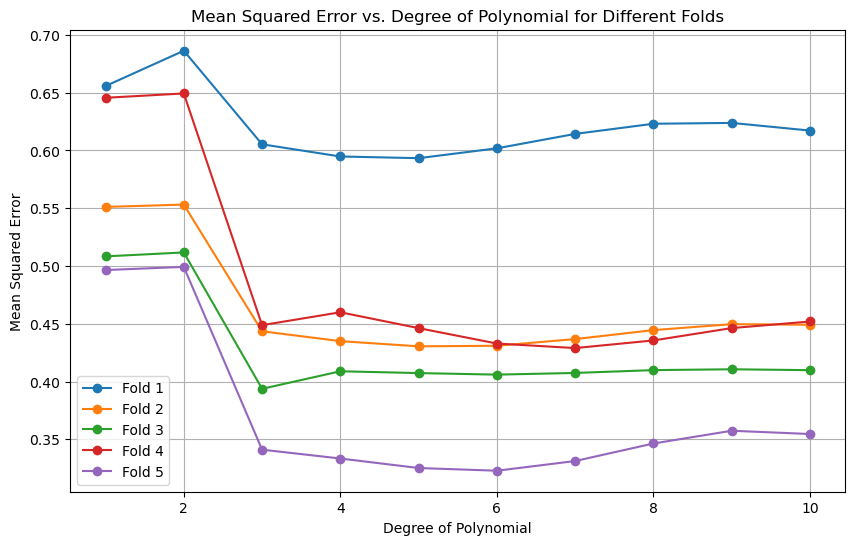

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Load the Auto MPG dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')

# Drop rows with missing values
auto_mpg = auto_mpg.dropna()

# Define features and target
features = auto_mpg[['Horsepower']]  # Only use 'Horsepower' as a feature
target = auto_mpg['MPG']

# Convert to numpy arrays for easier manipulation
X = features.to_numpy()
y = target.to_numpy()

# List of polynomial degrees
degrees = list(range(1, 11))  # Extend degrees to 10

# Create a plot
plt.figure(figsize=(10, 6))

# Create a 10-fold cross validator
kf = KFold(n_splits=5, shuffle=True, random_state=1)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    # Split the data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # List to store Mean Squared Errors
    mse_list = []

    for degree in degrees:
        # Add polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Create a linear regression model
        model = LinearRegression()

        # Train the model on the polynomial features training data
        model.fit(X_train_poly, y_train)

        # Use the trained model to predict the target values in the test set
        y_pred = model.predict(X_test_poly)

        # Calculate the Mean Squared Error of the model on the test set
        mse = mean_squared_error(y_test, y_pred)

        # Store the Mean Squared Error in the list
        mse_list.append(mse)

    # Plot the Mean Squared Error as a function of the degree of the polynomial for the current fold
    plt.plot(degrees, mse_list, marker='o', label=f'Fold {i + 1}')

plt.title('Mean Squared Error vs. Degree of Polynomial for Different Folds')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


### Stratified K Fold

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression

# Load iris dataset
data = load_iris()
X, y = data.data, data.target

# Create a Logistic Regression model
model = LogisticRegression(max_iter=10000, random_state=42)

# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Perform stratified cross validation
scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracies for each fold: ", scores)
print("Mean accuracy across all folds: ", scores.mean())


Accuracies for each fold:  [1.         0.96666667 0.93333333 1.         0.93333333]
Mean accuracy across all folds:  0.9666666666666668


In [19]:
print(3 and 4)

4


In [17]:
# help(train_test_split)